<a href="https://colab.research.google.com/github/NoheliaEstefhania/FC_Lab_2023/blob/main/Lab006/Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy.linalg as l
import numpy as np
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

### **1. Resolvamos aproximadamente la ecuación de Laplace ∇²u = 0 en un cuadrado definido por 0 < x < 4 y 0 < y < 4, con las condiciones en la frontera**
u(x,0) = 20 y u(x,4) = 300 para todo 0 <x <4

u(0,y) = 80 y u(4,y) = 0 para todo 0 <y <4

In [25]:
#hay que arreglar las condiciones de contorno
#error como máximo 0.1
#los valores de m y n pueden ser cualquiera
#ua : arriba
#ub : abajo
#uc : izquierda
#ud : derecha
#n : número de grillas filas
#m : número de grillas columnas
#h : número de veces que se repite el proceso
#error: como máximo 0.1
def laplace(ua,ub,uc,ud,n,m,h,error):
  u = np.array([[ 0 for i in range (n+2)] for j in range (m+2)])
  for i in range(n+2): #filas
    u[i][0]=uc 
    u[i][m+1]=ud 
  for j in range(m+2): #columnas
    u[0][j]=ua
    u[n+1][j]=ub
#empezamos a trabajar con todos los puntos
  p=(ua+ub+uc+ud)/4 #le decimos que cualquier punto que esté dentro, inicia la solución
  for i in range(1,n+1):
    for j in range(1,m+1):
      u[i][j]=p #colocamos el punto p

  k = 0 #contador
  conv = 0 # si es cero no encontró la solución

  while k<h and conv==0: #h me dice cuantas veces repite el procedimiento
    k=k+1
    t=u.copy()
    for i in range(1,n+1):
      for j in range(1,m+1):
        u[i][j] =0.25*(u[i+1][j]+u[i-1][j]+u[i][j+1]+u[i][j-1]) #solución de la ecuación de laplace numérica
    
    pp = np.subtract(u, t)
    if (l.norm(pp, np.inf)/l.norm(u,np.inf))<error: #si el valor encontrado es menor que el error , entonces converge
      conv=1
  if conv==1:
    x = np.array([ i+1 for i in range (m+2)]) #asignamos el valor de solución  a un vector
    y = np.array([ i+1 for i in range (n+2)])
    xx,yy = np.meshgrid(x,y) #gráfica
    print("u: \n ",u,"\n x: \n ",xx,"\n y: \n ",yy) #imprime los valores obtenidos
    
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection='3d')
    
    my_cmap = plt.get_cmap('hot') #color

    hm = ax.plot_surface(xx, yy, u, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    fig.colorbar(hm, ax = ax,
             shrink = 0.5, aspect = 5)
 
    ax.set_title('Ecuación de Laplace')

  else:
    print("no display")
  return

u: 
  [[ 20  20  20 ...  20  20  20]
 [ 80  65  62 ...  54  33   0]
 [ 80  81  82 ...  72  42   0]
 ...
 [ 80 102 113 ... 109  73   0]
 [ 80 160 184 ... 184 139   0]
 [300 300 300 ... 300 300 300]] 
 x: 
  [[   1    2    3 ... 1000 1001 1002]
 [   1    2    3 ... 1000 1001 1002]
 [   1    2    3 ... 1000 1001 1002]
 ...
 [   1    2    3 ... 1000 1001 1002]
 [   1    2    3 ... 1000 1001 1002]
 [   1    2    3 ... 1000 1001 1002]] 
 y: 
  [[   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 [   3    3    3 ...    3    3    3]
 ...
 [1000 1000 1000 ... 1000 1000 1000]
 [1001 1001 1001 ... 1001 1001 1001]
 [1002 1002 1002 ... 1002 1002 1002]]


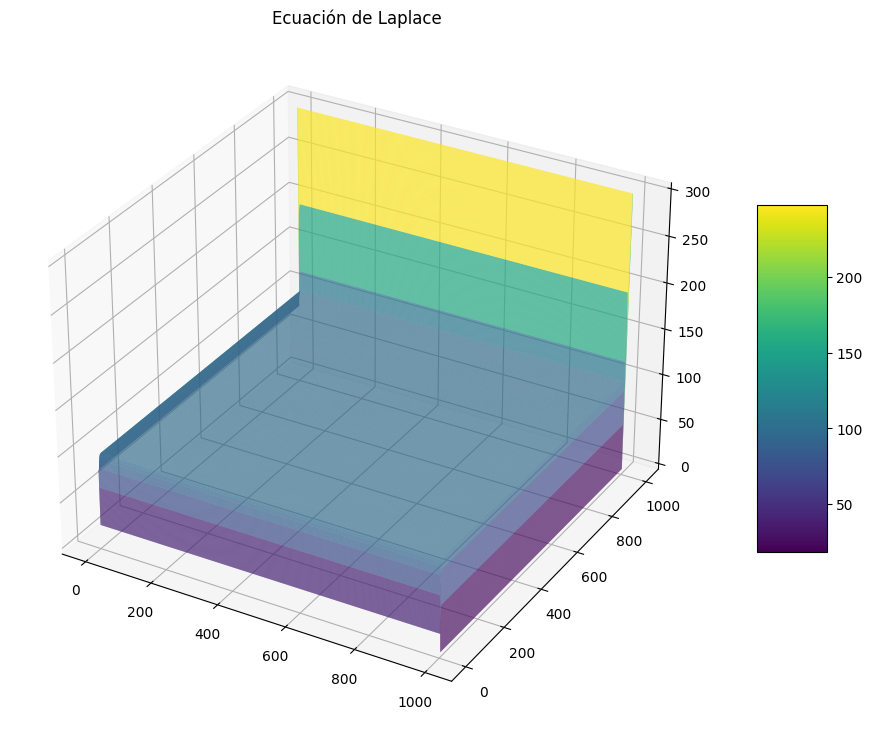

In [20]:
#laplace(ua,ub,uc,ud,n,m,h,error):
laplace(20,300,80,0,1000,1000,10000,0.1) #la gráfica dependerá de estos valores

u: 
  [[ 20  20  20  20  20  20  20  20  20  20  20  20]
 [ 80  65  62  61  61  61  61  61  61  54  33   0]
 [ 80  81  82  82  82  82  82  82  82  72  42   0]
 [ 80  87  90  91  91  91  91  91  91  81  47   0]
 [ 80  89  93  95  95  95  95  95  95  85  49   0]
 [ 80  89  94  96  97  97  97  97  97  86  50   0]
 [ 80  89  94  96  97  98  98  98  98  87  50   0]
 [ 80  89  94  96  97  98  98  98  98  87  50   0]
 [ 80  89  94  96  97  98  98  98  98  87  50   0]
 [ 80 102 113 118 119 120 120 120 120 109  73   0]
 [ 80 160 184 191 194 195 195 195 195 184 139   0]
 [300 300 300 300 300 300 300 300 300 300 300 300]] 
 x: 
  [[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7

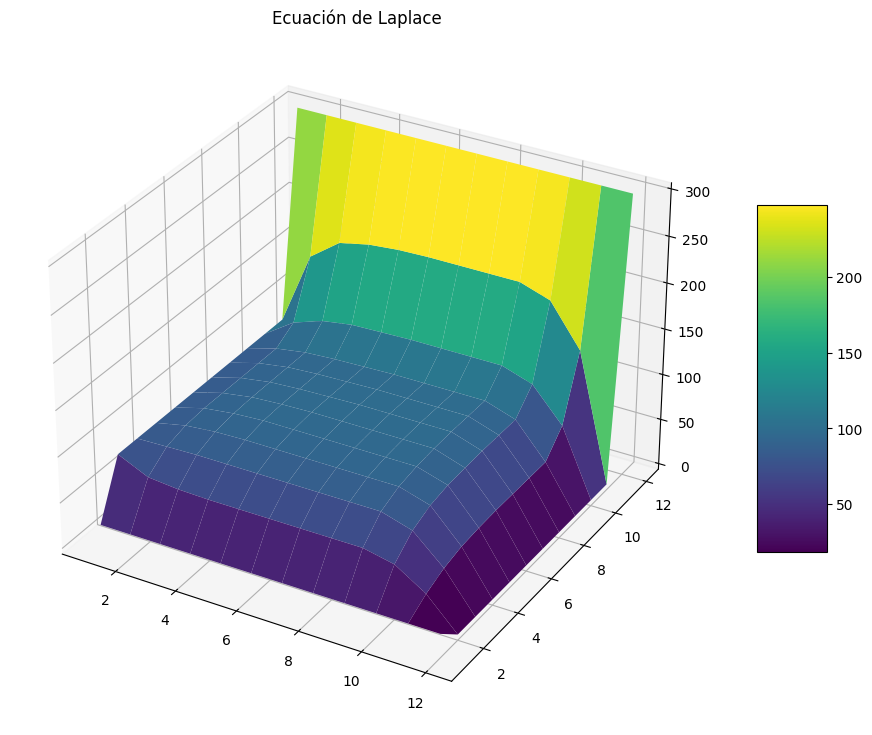

In [26]:
#laplace(ua,ub,uc,ud,n,m,h,error):
laplace(20,300,80,0,10,10,100,0.1) #la gráfica dependerá de estos valores

### **2. Use y modifique el código del ejercicio 1 y calcule las aproximaciones de la función u(x; y) en el cuadrado cuadrado definido por 0 < x < 4 y 0 < y < 4, con las condiciones en la frontera.**
(x,0) = 120 y u(x,4) = 0 para todo 0 <x <4

u(0,y) = 120 y u(4,y) = 0 para todo 0 <y <4

u: 
  [[120 120 120 120 120 120 120 120 120 120 120 120]
 [120 115 111 108 105 104 102  99  94  83  59   0]
 [120 111 103  98  93  90  87  82  73  59  35   0]
 [120 108  98  90  84  80  75  69  59  45  24   0]
 [120 105  93  84  78  73  67  60  50  36  19   0]
 [120 104  90  80  73  67  61  53  43  30  15   0]
 [120 102  87  75  67  61  55  47  38  26  13   0]
 [120  99  82  69  60  53  47  40  32  21  10   0]
 [120  94  73  59  50  43  38  32  25  16   7   0]
 [120  83  59  45  36  30  26  21  16  10   4   0]
 [120  59  35  24  19  15  13  10   7   4   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]] 
 x: 
  [[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 1  2  3  4  5  6  7

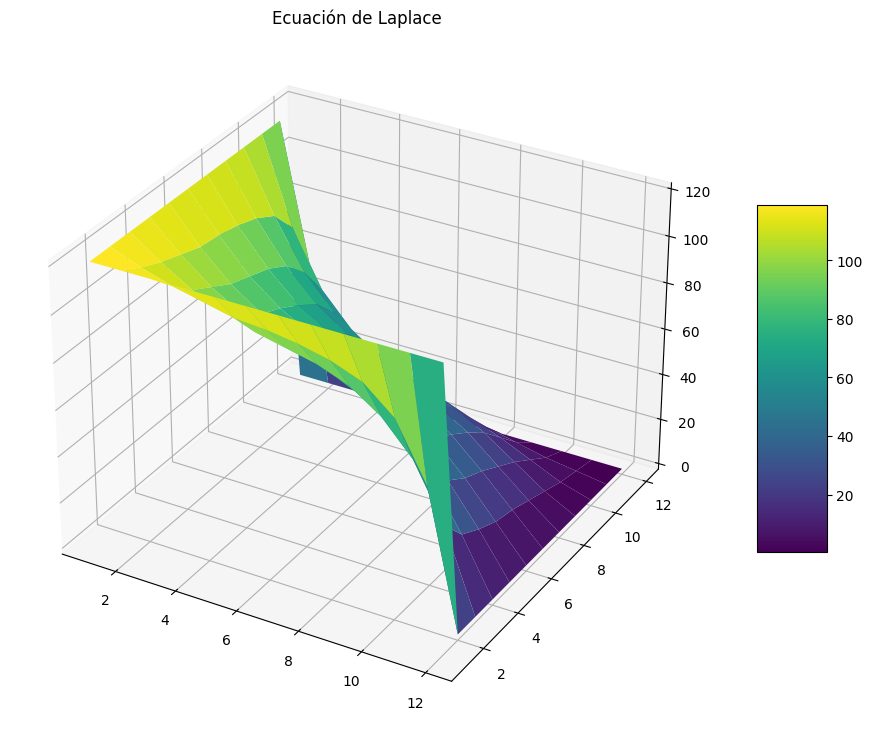

In [16]:
#laplace(ua,ub,uc,ud,n,m,h,error):
laplace(120,0,120,0,10,10,100,0.01) #la gráfica dependerá de estos valores